# Glassdor Data Science Jobs Compensation Comparison in The US

## Project Purpose:

To demonstrate a full analytics ETL project where data could be extracted from an API, Transformed, merged with a data from a flat file, analysed and loaded to a csv file for further analysis in Tableau

## Business Case:

- To see how compensation for advertised data jobs across cities in the US compares to the compensations for other advertised jobs in 2021
- To see how advertised job compensations vary across industries and location
- Understanding Salary classifications and what factors affect data science salary

In [453]:
# importing needed pyhton libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as plt
from matplotlib import pyplot
%matplotlib inline

import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy import stats

pd.options.mode.chained_assignment = None

#printing full column and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [454]:
#reading in  data showing data science job adverts  downloaded from kaggle
data_jobs = pd.read_csv('/Users/levy/Downloads/Data_Scientist_Salary.csv')

In [455]:
#inspecting data
data_jobs.tail()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
737,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK,MA,191,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,M
738,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 - 5000,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite,TN,15,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,data engineer,sr,na
739,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 - 1000,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute,PA,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,P
740,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 - 50,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC",PA,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
741,955,Research Scientist – Security and Privacy,$61K-$126K (Glassdoor est.),Returning Candidate? Log back in to the Career...,3.6,Riverside Research Institute\n3.6,"Beavercreek, OH","Arlington, VA",501 - 1000,1967,Nonprofit Organization,Federal Agencies,Government,$50 to $100 million (USD),-1,0,0,61,126,93.5,Riverside Research Institute,OH,54,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,na,M


In [456]:
data_jobs.describe(include='all')

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
count,742.000000,742,742,742,742.000000,742,742,742,742,742.000000,742,742,742,742,742,742.000000,742.000000,742.000000,742.000000,742.000000,742,742,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742,742,742
unique,NaN,264,416,463,NaN,343,200,198,8,NaN,9,60,25,13,128,NaN,NaN,NaN,NaN,NaN,343,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,3
top,NaN,Data Scientist,$49K-$113K (Glassdoor est.),Description\nMedical Laboratory Scientist - Te...,NaN,MassMutual\n3.6,"New York, NY","New York, NY",1001 - 5000,NaN,Company - Private,Biotech & Pharmaceuticals,Information Technology,Unknown / Non-Applicable,-1,NaN,NaN,NaN,NaN,NaN,MassMutual,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,data scientist,na,na
freq,NaN,131,6,4,NaN,14,55,52,150,NaN,410,112,180,204,460,NaN,NaN,NaN,NaN,NaN,14,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313,519,383
mean,469.129380,NaN,NaN,NaN,3.618868,NaN,NaN,NaN,NaN,1837.154987,NaN,NaN,NaN,NaN,NaN,0.032345,0.022911,74.754717,128.214286,101.484501,NaN,NaN,47.524259,0.528302,0.225067,0.237197,0.522911,0.512129,0.088949,0.039084,0.052561,0.072776,0.097035,0.167116,0.199461,0.075472,0.013477,0.049865,0.018868,NaN,NaN,NaN
std,279.793117,NaN,NaN,NaN,0.801210,NaN,NaN,NaN,NaN,497.183763,NaN,NaN,NaN,NaN,NaN,0.177034,0.149721,30.945892,45.128650,37.482449,NaN,NaN,53.839080,0.499535,0.417908,0.425651,0.499812,0.500190,0.284862,0.193925,0.223305,0.259944,0.296205,0.373331,0.399865,0.264329,0.115384,0.217813,0.136150,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,15.000000,16.000000,15.500000,NaN,NaN,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,221.500000,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,1939.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,52.000000,96.000000,73.500000,NaN,NaN,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,472.500000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,69.500000,124.000000,97.500000,NaN,NaN,25.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
75%,707.750000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,91.000000,155.000000,122.500000,NaN,NaN,60.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN


In [457]:
data_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

In [458]:
#sorting data by avg salary
data_jobs=data_jobs.sort_values(by=['Avg Salary(K)'],ascending=True)
data_jobs.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly,Employer provided,Lower Salary,Upper Salary,Avg Salary(K),company_txt,Job Location,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
240,296,Data Scientist,$15K-$16K(Employer est.),Learn and work on meaningful initiatives with ...,3.9,NPD\n3.9,"Port Washington, NY","Port Washington, NY",1001 - 5000,1966,Company - Private,Research & Development,Business Services,$100 to $500 million (USD),-1,0,0,15,16,15.5,NPD,NY,55,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,na,na
409,523,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 - 10000,2000,Company - Public,Financial Transaction Processing,Finance,$2 to $5 billion (USD),-1,1,0,20,35,27.5,FLEETCOR,TN,21,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,analyst,sr,na
618,787,"Senior Operations Data Analyst, Call Center Op...",$10-$17 Per Hour(Glassdoor est.),Summary\n\n\nIndependent contributor role that...,2.7,FLEETCOR\n2.7,"Nashville, TN","Peachtree Corners, GA",5001 - 10000,2000,Company - Public,Financial Transaction Processing,Finance,$2 to $5 billion (USD),-1,1,0,20,35,27.5,FLEETCOR,TN,21,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,analyst,sr,na
47,50,Associate Data Analyst,$20K-$39K (Glassdoor est.),Intrado is looking for an Associate Data Analy...,3.1,Intrado\n3.1,"Longmont, CO","Omaha, NE",5001 - 10000,1986,Company - Private,Enterprise Software & Network Solutions,Information Technology,$2 to $5 billion (USD),-1,0,0,20,39,29.5,Intrado,CO,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,analyst,na,M
538,689,Clinical Data Analyst,$27K-$48K (Glassdoor est.),Job Summary\n\n\nGreenway Health is actively s...,3.0,Greenway Health\n3.0,"Tampa, FL","Tampa, FL",1001 - 5000,1977,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),"eClinicalWorks, NextGen Healthcare, athenahealth",0,0,27,48,37.5,Greenway Health,FL,44,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,analyst,na,M


### Data Cleaning

In [459]:
#checking for missing data
data_jobs.isnull().sum()

index                 0
Job Title             0
Salary Estimate       0
Job Description       0
Rating                0
Company Name          0
Location              0
Headquarters          0
Size                  0
Founded               0
Type of ownership     0
Industry              0
Sector                0
Revenue               0
Competitors           0
Hourly                0
Employer provided     0
Lower Salary          0
Upper Salary          0
Avg Salary(K)         0
company_txt           0
Job Location          0
Age                   0
Python                0
spark                 0
aws                   0
excel                 0
sql                   0
sas                   0
keras                 0
pytorch               0
scikit                0
tensor                0
hadoop                0
tableau               0
bi                    0
flink                 0
mongo                 0
google_an             0
job_title_sim         0
seniority_by_title    0
Degree          

In [460]:
#checking and verifying data types 
print(data_jobs.dtypes)

index                   int64
Job Title              object
Salary Estimate        object
Job Description        object
Rating                float64
Company Name           object
Location               object
Headquarters           object
Size                   object
Founded                 int64
Type of ownership      object
Industry               object
Sector                 object
Revenue                object
Competitors            object
Hourly                  int64
Employer provided       int64
Lower Salary            int64
Upper Salary            int64
Avg Salary(K)         float64
company_txt            object
Job Location           object
Age                     int64
Python                  int64
spark                   int64
aws                     int64
excel                   int64
sql                     int64
sas                     int64
keras                   int64
pytorch                 int64
scikit                  int64
tensor                  int64
hadoop    

In [461]:
#checking for duplicates
data_jobs.duplicated().value_counts()


False    742
dtype: int64

In [462]:
data_jobs['Sector'].value_counts().head()

Information Technology       180
Biotech & Pharmaceuticals    112
Business Services             97
Insurance                     69
Health Care                   49
Name: Sector, dtype: int64

In [463]:
data_jobs['Revenue'].value_counts().head()

Unknown / Non-Applicable            204
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$1 to $2 billion (USD)               60
$500 million to $1 billion (USD)     57
Name: Revenue, dtype: int64

In [464]:
#replacing outlier strings 
data_jobs['Revenue']=data_jobs['Revenue'].replace('Unknown / Non-Applicable',np.nan)\
.replace('Less than $1 million (USD)', '$0 to $1 million (USD)')

In [465]:
data_jobs['Type of ownership'].value_counts().head()

Company - Private                 410
Company - Public                  193
Nonprofit Organization             55
Subsidiary or Business Segment     34
Government                         15
Name: Type of ownership, dtype: int64

In [466]:
data_jobs['Industry'].value_counts().head()

Biotech & Pharmaceuticals           112
Insurance Carriers                   63
Computer Hardware & Software         59
IT Services                          50
Health Care Services & Hospitals     49
Name: Industry, dtype: int64

In [467]:
#dropping outlier row
data_jobs.drop(data_jobs[data_jobs['Industry']=='-1'].index,inplace=True, axis=0)

In [468]:
data_jobs['Degree'].replace('na', 'no_degree',inplace=True)

In [469]:
data_jobs['seniority_by_title'].replace('na', 'no_title',inplace=True)

In [470]:
#rename column to have names without spaces
data_jobs=data_jobs.rename(columns={'Avg Salary(K)':'AvgSalary','Job Title':'JobTitle','Salary Estimate':\
'SalaryEstimate','Job Description':'JobDescription','Type of ownership':'Typeofownership','Job Location':\
'JobLocation'})

Outliers: 476    205.0
330    205.0
195    205.0
613    221.5
266    225.0
176    225.0
429    232.5
103    237.5
528    254.0
354    254.0
708    254.0
Name: AvgSalary, dtype: float64


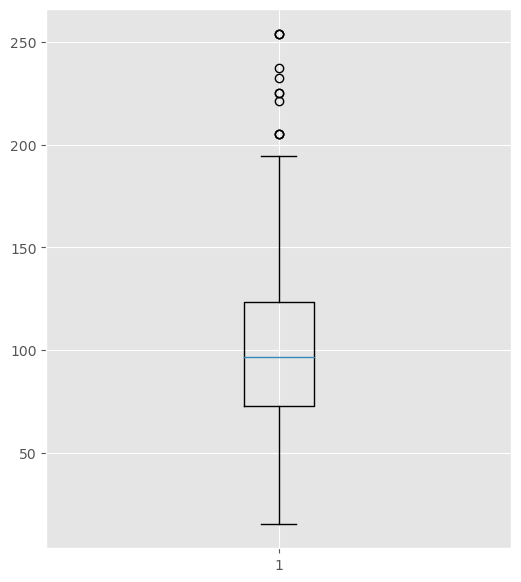

In [471]:
#Looking for outliers
data = data_jobs['AvgSalary']

# Create a box plot of the data
fig, ax = plt.subplots()
ax.boxplot(data)

# Calculate the upper and lower thresholds for outliers
q1, q3 = np.percentile(data, [25, 75])
iqr = q3 - q1
upper_threshold = q3 + 1.5*iqr
lower_threshold = q1 - 1.5*iqr

# Identify the outliers
outliers = data[(data > upper_threshold) | (data < lower_threshold)]

print(f'Outliers: {outliers}')

plt.show()

In [472]:
#!5.5 is very low and less than minimum wage of $7.25 per hour we will be dropping the related rows

data_jobs.drop(data_jobs[data_jobs['AvgSalary']==15.5].index, inplace=True)

In [473]:
data_jobs.drop(columns=['SalaryEstimate','Hourly','Employer provided','Lower Salary','Upper Salary','Competitors',\
                        'Company Name'],inplace=True)

### Feature Engineering

In [474]:
data_jobs['city'] = data_jobs['Location'].str.split(',').str[0]

In [475]:
data_jobs['states'] = data_jobs['Location'].str.split(',').str[-1]

In [476]:
#Revenue is a range of string values, will be splitting into lower and upper range
#Splitting and transfroming Revenue to remove unwanted string
#Extracting lower range of revenue
lowerRevenue=data_jobs['Revenue'].str.split('(').str[0].str.split(' ').str[:3].str[0].str.split('$').str[1]
mb=data_jobs['Revenue'].str.split('(').str[0].str.split(' ').str[3].replace('million','000000').replace\
('billion','000000000')
data_jobs['lowerRevenue']=lowerRevenue+mb

In [477]:
#Extracting upper range of revenue
HigherRevenue=data_jobs['Revenue'].str.split('(').str[0].str.split(' ').str[:3].str[-1].str.split('$').str[1]
mb=data_jobs['Revenue'].str.split('(').str[0].str.split(' ').str[3].replace('million','000000').replace\
('billion','000000000')
data_jobs['HigherRevenue']=HigherRevenue+mb

In [478]:
#removing outlier values
data_jobs['lowerRevenue']=data_jobs['lowerRevenue'].replace('500$1','500')

In [479]:
#Before we get the average revenue, we will have to convert the types to int
data_jobs['lowerRevenue']=pd.to_numeric(data_jobs['lowerRevenue'])

In [480]:
data_jobs['HigherRevenue']=pd.to_numeric(data_jobs['HigherRevenue'])

In [481]:
#Calculating Average revenue
data_jobs['AverageRevenue']=(data_jobs['lowerRevenue']+data_jobs['HigherRevenue'])/2

In [482]:
#replace nan values with the average revenue
data_jobs['AverageRevenue'].fillna(data_jobs['AverageRevenue'].mean(),inplace=True)

In [483]:
#Categorizing avg Salary into low, medium and high categories
bins = np.linspace(min(data_jobs["AvgSalary"]), max(data_jobs["AvgSalary"]), 4)
group_names = ['Low', 'Medium', 'High']
data_jobs['AvgSalary-binned'] = pd.cut(data_jobs['AvgSalary'], bins, labels=group_names, include_lowest=True )
salary_cat=data_jobs.groupby('AvgSalary-binned')['AvgSalary'].agg(["min", "max"]).reset_index()
salary_cat.rename(columns={'AvgSalary-binned':'Salary_Category','max':'max_range',\
                           'min':'min_range'}, inplace=True)
salary_cat

,Salary_Category,min_range,max_range
0,Low,27.5,103.0
1,Medium,103.5,177.0
2,High,179.5,254.0


### Data Visualization

<BarContainer object of 3 artists>

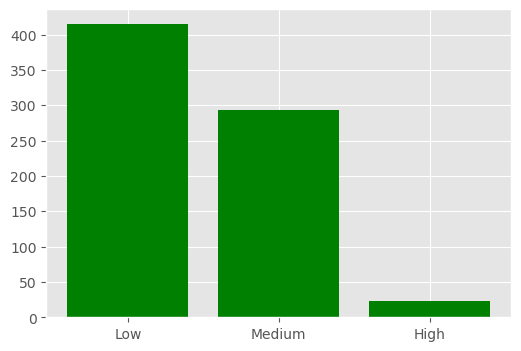

In [484]:
#Visualizing disribution of binned Salary Categories
plt.rcParams['figure.figsize'] = (6,4)
pyplot.bar(group_names, data_jobs["AvgSalary-binned"].value_counts(),color='green')

Text(0.5, 1.0, 'Type of ownership')

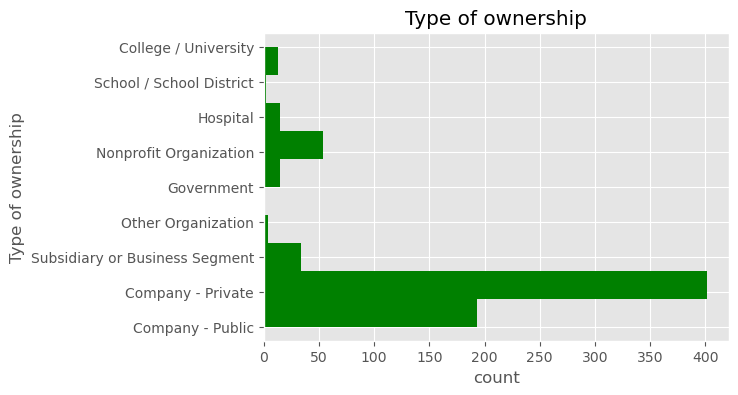

In [485]:
plt.hist(data_jobs["Typeofownership"],color='green', orientation='horizontal')

# set x/y labels and plot title
plt.xlabel("count")
plt.ylabel("Type of ownership")
plt.title("Type of ownership")

### Checking for Correlations 

There are some categorical and continuous feature that may affect the salary of a data job, we will categorize these
features into continuous, tool based catgorical (e.g Python, aws, etc) and other categoricals.

In [486]:
#We will start by checking the correlation between tool based categoricals and average price using three way ANOVA 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform three-way ANOVA
model = ols("AvgSalary ~ C(Python) + C(spark) + C(aws) + C(excel) + C(sql) + C(keras) + C(pytorch) + C(scikit)\
+ C(sas) + C(tensor) + C(hadoop) + C(tableau) + C(bi) + C(flink) + C(mongo) + C(google_an) ",\
            data=data_jobs).fit()

md=sm.stats.anova_lm(model, typ=2)

#filtering out categories with p-values of more than 0.05
md=md.sort_values(by=['PR(>F)','F'], ascending=True)
md=md[md['PR(>F)']<0.05]

In [487]:
print('Fvalue is significant and Pvalue is below 0.05')

Fvalue is significant and Pvalue is below 0.05


In [488]:
md

,sum_sq,df,F,PR(>F)
C(Python),72798.005972,1.0,62.203923,1.161992e-14
C(sas),18059.235413,1.0,15.431127,9.387444e-05
C(sql),12762.820377,1.0,10.905484,1.006554e-03
C(aws),11406.285291,1.0,9.746362,1.869274e-03
C(google_an),10481.798020,1.0,8.956412,2.860343e-03
C(pytorch),7120.114575,1.0,6.083945,1.387536e-02
C(tensor),6198.664481,1.0,5.296591,2.165430e-02


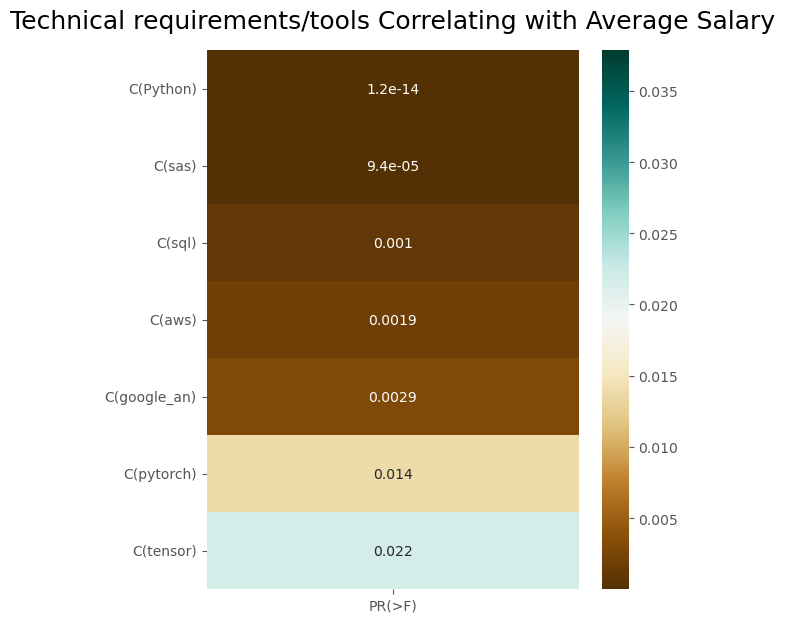

In [489]:
#plotting result of Anova correlation on a heat map 3.785052e-02
plt.rcParams['figure.figsize'] = (6,7)
heatmap = sns.heatmap(md[['PR(>F)']], vmin=8.556934e-10, vmax=3.785052e-02, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
heatmap.set_title('Technical requirements/tools Correlating with Average Salary', fontdict={'fontsize':18}, pad=16);

In [490]:
fg=data_jobs[['Rating','Founded','AvgSalary','AverageRevenue','Age']].corr(method = 'pearson')
fg

,Rating,Founded,AvgSalary,AverageRevenue,Age
Rating,1.000000,0.101432,0.054405,-0.042911,-0.053467
Founded,0.101432,1.000000,0.009811,0.085636,0.104333
AvgSalary,0.054405,0.009811,1.000000,-0.006209,0.027087
AverageRevenue,-0.042911,0.085636,-0.006209,1.000000,0.180027
Age,-0.053467,0.104333,0.027087,0.180027,1.000000


In [491]:
pearson_coef, p_value = stats.pearsonr(fg['AvgSalary'], fg['Age'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.29612598544713187  with a P-value of P = 0.6285460066975123


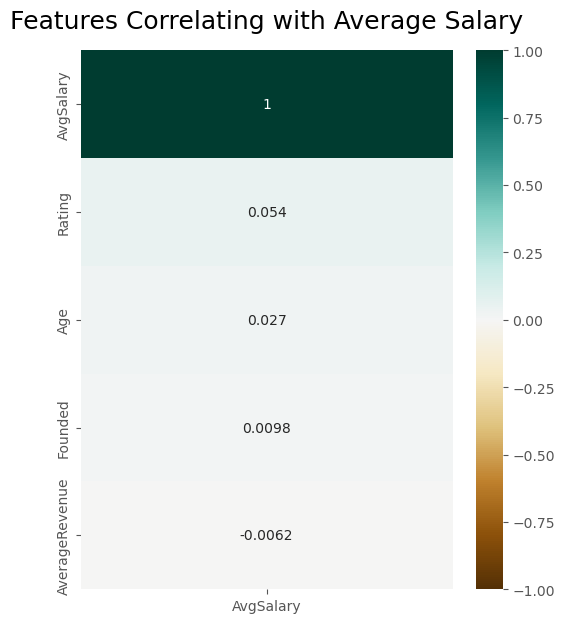

In [492]:
data_jobs_tools_solo2=data_jobs[['Rating','Founded','AvgSalary','AverageRevenue','Age']].corr(method = 'pearson')\
[['AvgSalary']].sort_values(by='AvgSalary',ascending=False)
heatmap = sns.heatmap(data_jobs_tools_solo2, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
heatmap.set_title('Features Correlating with Average Salary', fontdict={'fontsize':18}, pad=16);

In [493]:
#Next we will check the correlation between other categoricals and average price using three way Anova 
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform three-way ANOVA
model = ols("AvgSalary ~ + C(JobTitle) + C(JobDescription) + C(Location) + C(Degree) + C(seniority_by_title)\
+ C(job_title_sim) + C(Headquarters) + C(Typeofownership) + C(Industry) + C(Sector) + C(company_txt)",\
            data=data_jobs).fit()

md=sm.stats.anova_lm(model, typ=2)
md1=md.sort_values(by='F', ascending=True)
md1

,sum_sq,df,F,PR(>F)
C(Headquarters),2.053727e+05,192.0,1.315443e+28,0.0
C(Industry),6.721182e+04,58.0,1.425110e+28,0.0
C(Location),2.399264e+05,198.0,1.490196e+28,0.0
C(Sector),2.969126e+04,23.0,1.587564e+28,0.0
C(Degree),2.638568e+03,2.0,1.622441e+28,0.0
C(company_txt),5.014605e+05,336.0,1.835389e+28,0.0
C(JobTitle),8.264841e+05,258.0,3.939539e+28,0.0
C(JobDescription),2.610792e+06,454.0,7.072077e+28,0.0
C(Typeofownership),4.809498e+04,8.0,7.393335e+28,0.0
C(job_title_sim),1.125354e+05,9.0,1.537719e+29,0.0


#### Examining  correlation between some  Categories and avg price

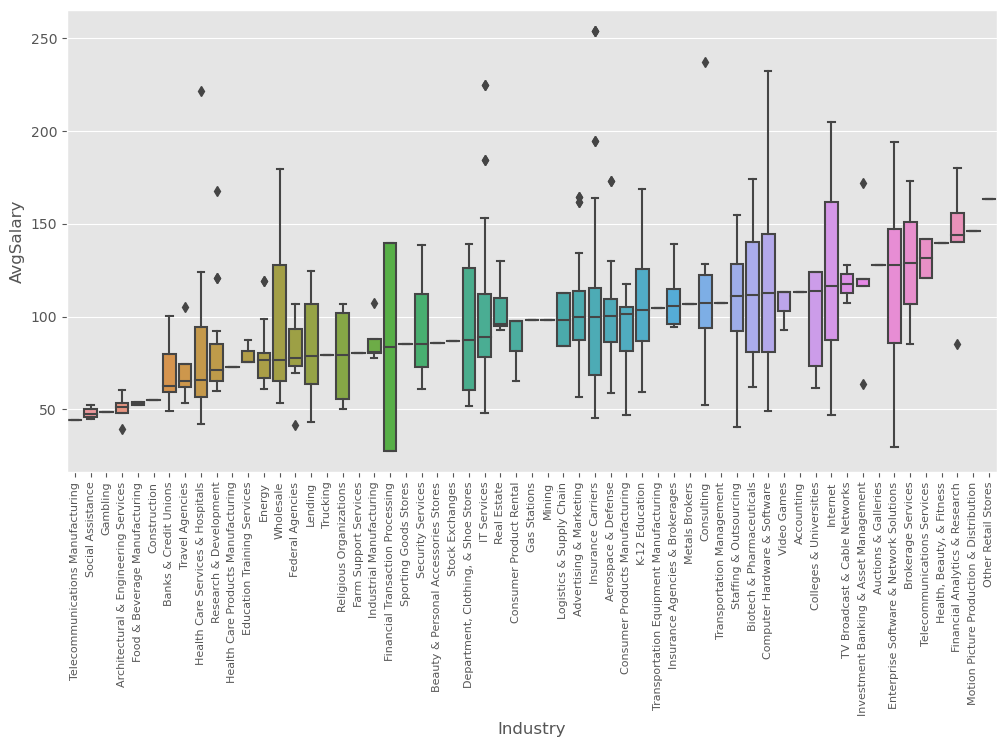

In [565]:
# Find the correlation btw Industry and avg salary

# setting the size
plt.figure(figsize=(12, 6))

my_order = data_jobs.groupby(by=["Industry"])["AvgSalary"].median().sort_values().index
r=sns.boxplot(x="Industry", y="AvgSalary", data=data_jobs, order=my_order)

r.tick_params(axis='x', rotation=90, labelsize=8)
plt.show()

<Figure size 1100x500 with 0 Axes>

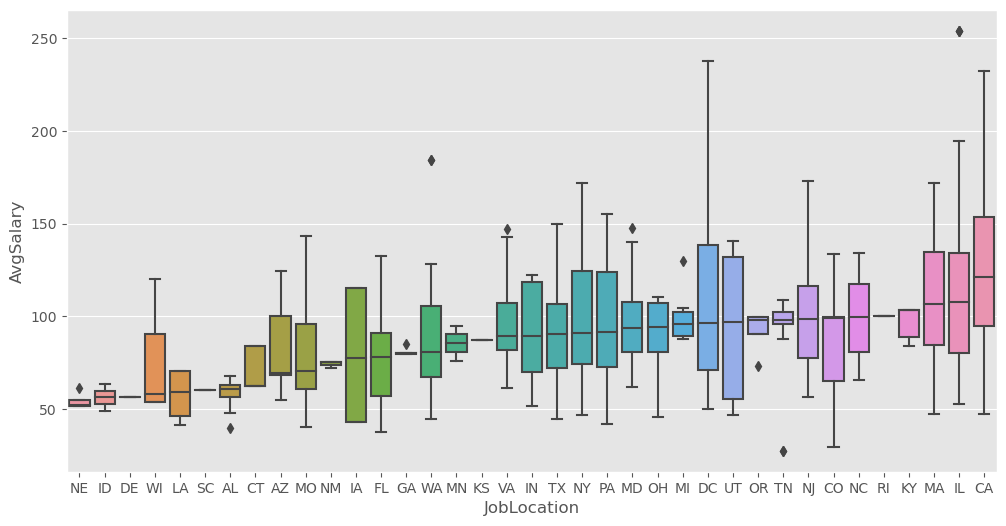

<Figure size 1100x500 with 0 Axes>

In [559]:
# Find the correlation btw Industry and avg salary

plt.figure(figsize=(12, 6))

my_order = data_jobs.groupby(by=["JobLocation"])["AvgSalary"].median().sort_values().index
sns.boxplot(x="JobLocation", y="AvgSalary", data=data_jobs, order=my_order)
plt.figure(figsize=(11, 5))


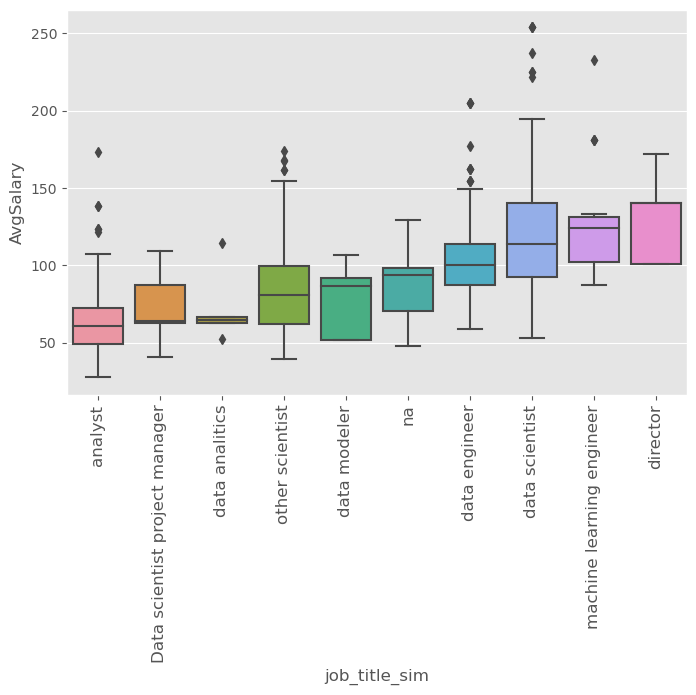

<Figure size 1000x200 with 0 Axes>

In [564]:
# Find the correlation btw job_title_sim and avg salary

plt.figure(figsize=(8, 5))

my_order = data_jobs.groupby(by=["job_title_sim"])["AvgSalary"].median().sort_values().index
t=sns.boxplot(x="job_title_sim", y="AvgSalary", data=data_jobs, order=my_order)
plt.figure(figsize=(10, 2))
t.tick_params(axis='x', rotation=90, labelsize=12)

<AxesSubplot:xlabel='Degree', ylabel='AvgSalary'>

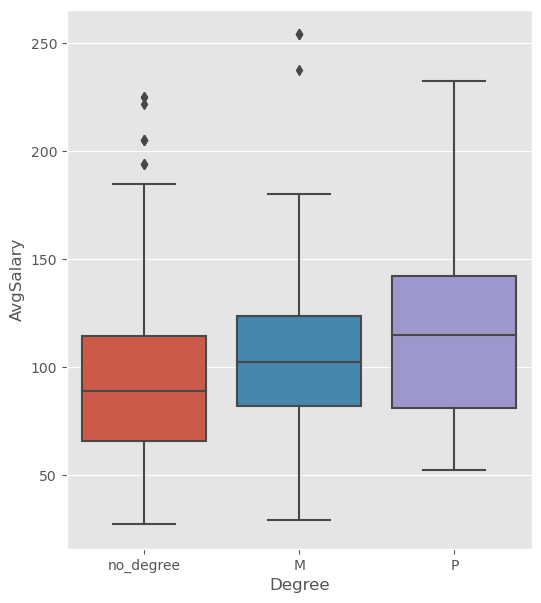

In [549]:
# Find the correlation btw job_title_sim and avg salary
my_order = data_jobs.groupby(by=["Degree"])["AvgSalary"].mean().sort_values().index
sns.boxplot(x="Degree", y="AvgSalary", data=data_jobs, order=my_order)

<AxesSubplot:xlabel='aws', ylabel='AvgSalary'>

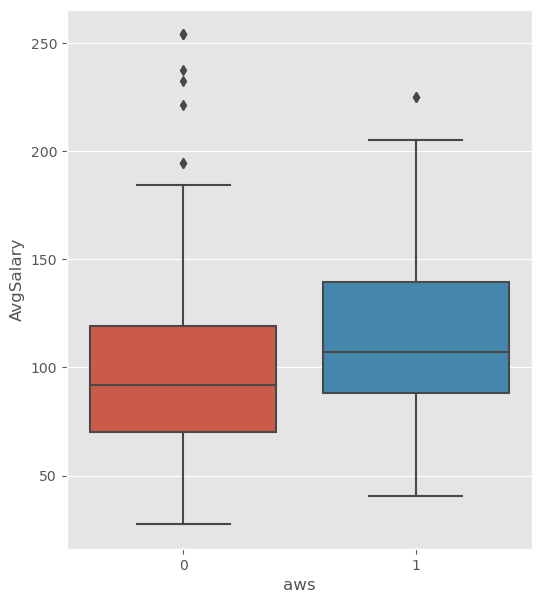

In [499]:
# Find the correlation btw aws and avg salary
my_order = data_jobs.groupby(by=["aws"])["AvgSalary"].mean().sort_values().index
sns.boxplot(x="aws", y="AvgSalary", data=data_jobs, order=my_order)

In [500]:
# Looking at the top 10 job_title_sim by Avg Salary(K)

HighestPaidjob_title_sim  = data_jobs.groupby(['job_title_sim'])[['AvgSalary']].mean()
HighestPaidjob_title_sim_sort = HighestPaidjob_title_sim.sort_values(['AvgSalary'], ascending = False)
HighestPaidjob_title_sim_sort = HighestPaidjob_title_sim_sort['AvgSalary'].astype('int64') 
HighestPaidjob_title_sim_sort
                            

job_title_sim
director                          130
machine learning engineer         126
data scientist                    118
data engineer                     105
na                                 91
other scientist                    86
data modeler                       77
Data scientist project manager     73
data analitics                     69
analyst                            66
Name: AvgSalary, dtype: int64

In [501]:
# Looking at the top 10 industry  by Avg Salary(K)

HighestPaidIndustries = data_jobs.groupby(['Industry'])[['AvgSalary']].mean()
HighestPaidIndustries_sort = HighestPaidIndustries.sort_values(['AvgSalary'], ascending = False)[:10]
HighestPaidIndustries_sort = HighestPaidIndustries_sort['AvgSalary'].astype('int64') 
HighestPaidIndustries_sort

Industry
Other Retail Stores                         163
Motion Picture Production & Distribution    146
Financial Analytics & Research              145
Health, Beauty, & Fitness                   139
Telecommunications Services                 131
Brokerage Services                          129
Auctions & Galleries                        128
Internet                                    123
Investment Banking & Asset Management       118
TV Broadcast & Cable Networks               117
Name: AvgSalary, dtype: int64

In [502]:
# Looking at  degrees by Avg Salary(K) 
HighestPaidIndustries = data_jobs.groupby(['Degree'])[['AvgSalary']].mean()
HighestPaidIndustries_sort = HighestPaidIndustries.sort_values(['AvgSalary'], ascending = False)[:10]
HighestPaidIndustries_sort = HighestPaidIndustries_sort['AvgSalary'].astype('int64') 
HighestPaidIndustries_sort

Degree
P            115
M            105
no_degree     94
Name: AvgSalary, dtype: int64

In [503]:
# Looking at top 10 job location by Avg Salary(K) 
HighestPaidJobLocations = data_jobs.groupby(['JobLocation'])[['AvgSalary']].mean()
HighestPaidJobLocations_sort =HighestPaidJobLocations.sort_values(['AvgSalary'], ascending = False)[:10]
HighestPaidJobLocations_sort = HighestPaidJobLocations_sort['AvgSalary'].astype('int64') 
HighestPaidJobLocations_sort

JobLocation
CA    123
IL    116
DC    110
MA    106
NJ    104
MI    100
RI    100
NY     99
NC     98
MD     97
Name: AvgSalary, dtype: int64

### Importing data from Bureau of economic analysis via API 

Will import data via API from BEA to see how the advertised average salary for data jobs compare to the average salary for all other advertised jobs

In [504]:
#importing requests
import requests

In [505]:
base = 'https://apps.bea.gov/api/data/?&UserID={}'.format('5A9F13CA-40B9-446F-95AB-015B7F8BEF40')
m = '&method=GetData'
ind = '&TableName=CAINC6N'
#freq = '&Frequency=A'
year = '&Year=2021'
fmt = '&ResultFormat=json'
line = '&LineCode=9'
loc = '&GeoFips=MSA'
dataset = '&DataSetName=Regional'

# Combined url for request
url = '{}{}{}{}{}{}{}{}'.format(base, m, dataset, year, ind, line, loc, fmt)

r = requests.get(url).json()


In [506]:
average_job_compensation = pd.DataFrame(r['BEAAPI']['Results']['Data'])
average_job_compensation.head()

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue,NoteRef
0,CAINC6N-9,00998,United States (Metropolitan Portion),2021,Dollars,0,"85,282",NaN
1,CAINC6N-9,10180,"Abilene, TX (Metropolitan Statistical Area)",2021,Dollars,0,"61,199",NaN
2,CAINC6N-9,10420,"Akron, OH (Metropolitan Statistical Area)",2021,Dollars,0,"70,641",NaN
3,CAINC6N-9,10500,"Albany, GA (Metropolitan Statistical Area)",2021,Dollars,0,"60,914",NaN
4,CAINC6N-9,10540,"Albany-Lebanon, OR (Metropolitan Statistical A...",2021,Dollars,0,"63,142",NaN


In [507]:
average_job_compensation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Code        385 non-null    object
 1   GeoFips     385 non-null    object
 2   GeoName     385 non-null    object
 3   TimePeriod  385 non-null    object
 4   CL_UNIT     385 non-null    object
 5   UNIT_MULT   385 non-null    object
 6   DataValue   385 non-null    object
 7   NoteRef     14 non-null     object
dtypes: object(8)
memory usage: 24.2+ KB


### Feature engineering

In [508]:
average_job_compensation['GeoName']=average_job_compensation['GeoName'].str.split('(').str[0]

In [509]:
average_job_compensation['city']=average_job_compensation['GeoName'].str.split(',').str[0]

In [510]:
average_job_compensation['city']=average_job_compensation['city'].apply(lambda x: x.split('-'))


In [511]:
average_job_compensation['states']=average_job_compensation['GeoName'].str.split(',').str[-1]

In [512]:
average_job_compensation['states']=average_job_compensation['states'].apply(lambda x: x.split('-'))


In [513]:
average_job_compensation=average_job_compensation.drop(['NoteRef','UNIT_MULT','Code','GeoFips'], axis=1)


In [514]:
average_job_compensation.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
0,United States,2021,Dollars,"85,282",[United States ],[United States ]
1,"Abilene, TX",2021,Dollars,"61,199",[Abilene],[ TX ]
2,"Akron, OH",2021,Dollars,"70,641",[Akron],[ OH ]
3,"Albany, GA",2021,Dollars,"60,914",[Albany],[ GA ]
4,"Albany-Lebanon, OR",2021,Dollars,"63,142","[Albany, Lebanon]",[ OR ]


#### Since the location data comes in different complex format, a simple explode will not solve this, will categorise the data into the different format and explode accordingly

In [515]:
#To be able to transform the data properly we have to understand city vs state combination
#number of cities/towns per cell
average_job_compensation['city'].str.len().value_counts().reset_index().rename\
(columns={'index':'# of cities per cell','city':'frequency'})

,# of cities per cell,frequency
0,1,242
1,2,90
2,3,51
3,6,1
4,4,1


In [516]:
#number of states per cell
average_job_compensation['states'].str.len().value_counts().reset_index().rename\
(columns={'index':'# of states per cell','states':'frequency'})  

,# of states per cell,frequency
0,1,339
1,2,38
2,3,6
3,4,2


In [517]:
#First table dealing with 1 state/ 1 city combination
table0=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==1)\
& average_job_compensation['city'].apply(lambda x: len(x)==1)].explode(['city'])
table0['states']=[row for rows in table0['states'] for row in rows]#converting lists to string

table0.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
0,United States,2021,Dollars,"85,282",United States,United States
1,"Abilene, TX",2021,Dollars,"61,199",Abilene,TX
2,"Akron, OH",2021,Dollars,"70,641",Akron,OH
3,"Albany, GA",2021,Dollars,"60,914",Albany,GA
6,"Albuquerque, NM",2021,Dollars,"68,962",Albuquerque,NM


In [518]:
#Second table dealing with 1 state/2 city combination
table1=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==1)\
& average_job_compensation['city'].apply(lambda x: len(x)==2)].explode('city')
table1['states']=[row for rows in table1['states'] for row in rows]#converting lists to string

table1.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
4,"Albany-Lebanon, OR",2021,Dollars,"63,142",Albany,OR
4,"Albany-Lebanon, OR",2021,Dollars,"63,142",Lebanon,OR
14,"Anniston-Oxford, AL",2021,Dollars,"57,412",Anniston,AL
14,"Anniston-Oxford, AL",2021,Dollars,"57,412",Oxford,AL
17,"Athens-Clarke County, GA",2021,Dollars,"63,035",Athens,GA


In [519]:
#Third table dealing with 1 state/3 city combination
table2=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==1)\
& average_job_compensation['city'].apply(lambda x: len(x)==3)].explode('city')
table2['states']=[row for rows in table2['states'] for row in rows]#converting lists to string

table2.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
5,"Albany-Schenectady-Troy, NY",2021,Dollars,"87,916",Albany,NY
5,"Albany-Schenectady-Troy, NY",2021,Dollars,"87,916",Schenectady,NY
5,"Albany-Schenectady-Troy, NY",2021,Dollars,"87,916",Troy,NY
18,"Atlanta-Sandy Springs-Alpharetta, GA",2021,Dollars,"85,619",Atlanta,GA
18,"Atlanta-Sandy Springs-Alpharetta, GA",2021,Dollars,"85,619",Sandy Springs,GA


In [520]:
#Fourth table dealing with 1 state/4 city combination
table3=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==1)\
& average_job_compensation['city'].apply(lambda x: len(x)==4)].explode('city')
table3['states']=[row for rows in table3['states'] for row in rows]#converting lists to string
table3['city']=table3['city'].replace('',np.nan)#replacing white spaces with nan
table3.dropna(inplace = True)#dropping rows with null city                 
table3.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
320,"Scranton--Wilkes-Barre, PA",2021,Dollars,"63,563",Scranton,PA
320,"Scranton--Wilkes-Barre, PA",2021,Dollars,"63,563",Wilkes,PA
320,"Scranton--Wilkes-Barre, PA",2021,Dollars,"63,563",Barre,PA


In [521]:
#Five table dealing with 1 state/6 city combination
table4=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==1)\
& average_job_compensation['city'].apply(lambda x: len(x)==6)].explode('city')
table4['city']=table4['city'].replace('',np.nan)#replacing white spaces with nan
table4.dropna(inplace = True)#dropping rows with null city 
table4['states']=[row for rows in table4['states'] for row in rows]#converting lists to string

table4.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
246,"Nashville-Davidson--Murfreesboro--Franklin, TN",2021,Dollars,"78,650",Nashville,TN
246,"Nashville-Davidson--Murfreesboro--Franklin, TN",2021,Dollars,"78,650",Davidson,TN
246,"Nashville-Davidson--Murfreesboro--Franklin, TN",2021,Dollars,"78,650",Murfreesboro,TN
246,"Nashville-Davidson--Murfreesboro--Franklin, TN",2021,Dollars,"78,650",Franklin,TN


In [522]:
#Sixth table dealing with 2 state/1 city combination
table5=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==2)\
& average_job_compensation['city'].apply(lambda x: len(x)==1)].explode('states')
table5['states']=table5['states'].str.strip()
table5['city']=[row for rows in table5['city'] for row in rows]#converting lists to string

table5.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
56,"Cape Girardeau, MO-IL",2021,Dollars,"59,096",Cape Girardeau,MO
56,"Cape Girardeau, MO-IL",2021,Dollars,"59,096",Cape Girardeau,IL
67,"Chattanooga, TN-GA",2021,Dollars,"68,879",Chattanooga,TN
67,"Chattanooga, TN-GA",2021,Dollars,"68,879",Chattanooga,GA
72,"Clarksville, TN-KY",2021,Dollars,"66,973",Clarksville,TN


In [523]:
#Seventh table dealing with 2 state/2 city combination
table6=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==2)\
& average_job_compensation['city'].apply(lambda x: len(x)==2)].explode(['city','states'])
table6['states']=table6['states'].str.strip()
table6.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
21,"Augusta-Richmond County, GA-SC",2021,Dollars,"70,113",Augusta,GA
21,"Augusta-Richmond County, GA-SC",2021,Dollars,"70,113",Richmond County,SC
147,"Hagerstown-Martinsburg, MD-WV",2021,Dollars,"64,567",Hagerstown,MD
147,"Hagerstown-Martinsburg, MD-WV",2021,Dollars,"64,567",Martinsburg,WV
184,"Kingsport-Bristol, TN-VA",2021,Dollars,"63,019",Kingsport,TN


In [524]:
#Eight table dealing with 2 state/3 city combination
table7=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==2)\
& average_job_compensation['city'].apply(lambda x: len(x)==3)].explode('city').explode('states')
table7['states']=table7['states'].str.strip()

table7.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
8,"Allentown-Bethlehem-Easton, PA-NJ",2021,Dollars,"73,615",Allentown,PA
8,"Allentown-Bethlehem-Easton, PA-NJ",2021,Dollars,"73,615",Allentown,NJ
8,"Allentown-Bethlehem-Easton, PA-NJ",2021,Dollars,"73,615",Bethlehem,PA
8,"Allentown-Bethlehem-Easton, PA-NJ",2021,Dollars,"73,615",Bethlehem,NJ
8,"Allentown-Bethlehem-Easton, PA-NJ",2021,Dollars,"73,615",Easton,PA


In [525]:
#Ninth table dealing with 3 state/1 city combination
table9=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==3)\
& average_job_compensation['city'].apply(lambda x: len(x)==1)].explode('states')
table9['states']=table9['states'].str.strip()
table9['city']=[row for rows in table9['city'] for row in rows]#converting lists to string

table9.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
71,"Cincinnati, OH-KY-IN",2021,Dollars,"78,232",Cincinnati,OH
71,"Cincinnati, OH-KY-IN",2021,Dollars,"78,232",Cincinnati,KY
71,"Cincinnati, OH-KY-IN",2021,Dollars,"78,232",Cincinnati,IN
224,"Memphis, TN-MS-AR",2021,Dollars,"73,690",Memphis,TN
224,"Memphis, TN-MS-AR",2021,Dollars,"73,690",Memphis,MS


In [526]:
#Tenth table dealing with 3 state/2 city combination
table10=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==3)\
& average_job_compensation['city'].apply(lambda x: len(x)==2)].explode('states').explode('city')
table10.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
161,"Huntington-Ashland, WV-KY-OH",2021,Dollars,"62,544",Huntington,WV
161,"Huntington-Ashland, WV-KY-OH",2021,Dollars,"62,544",Ashland,WV
161,"Huntington-Ashland, WV-KY-OH",2021,Dollars,"62,544",Huntington,KY
161,"Huntington-Ashland, WV-KY-OH",2021,Dollars,"62,544",Ashland,KY
161,"Huntington-Ashland, WV-KY-OH",2021,Dollars,"62,544",Huntington,OH


In [527]:
#Eleventh table dealing with 3 state/3 city combination
table11=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==3)\
& average_job_compensation['city'].apply(lambda x: len(x)==3)].explode(['states','city'])
table11['states']=table11['states'].str.strip()

table11.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
69,"Chicago-Naperville-Elgin, IL-IN-WI",2021,Dollars,"91,855",Chicago,IL
69,"Chicago-Naperville-Elgin, IL-IN-WI",2021,Dollars,"91,855",Naperville,IN
69,"Chicago-Naperville-Elgin, IL-IN-WI",2021,Dollars,"91,855",Elgin,WI
250,"New York-Newark-Jersey City, NY-NJ-PA",2021,Dollars,"113,115",New York,NY
250,"New York-Newark-Jersey City, NY-NJ-PA",2021,Dollars,"113,115",Newark,NJ


In [528]:
#Twelfth table dealing with 4 state/3 city combination
table15=average_job_compensation[average_job_compensation['states'].apply(lambda x: len(x)==4)\
& average_job_compensation['city'].apply(lambda x: len(x)==3)].explode('city').explode('states')
table15['states']=table15['states'].str.strip()

table15.head()

,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
270,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2021,Dollars,"88,438",Philadelphia,PA
270,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2021,Dollars,"88,438",Philadelphia,NJ
270,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2021,Dollars,"88,438",Philadelphia,DE
270,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2021,Dollars,"88,438",Philadelphia,MD
270,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",2021,Dollars,"88,438",Camden,PA


In [529]:
#Unioning all the tables to recreate the dataset
job_compensation=pd.concat([table0,table1,table2,table3,table4,table5,table6,table7,table9,table10,table11,table15]\
                           ,axis=0).reset_index()
job_compensation.head()

,index,GeoName,TimePeriod,CL_UNIT,DataValue,city,states
0,0,United States,2021,Dollars,"85,282",United States,United States
1,1,"Abilene, TX",2021,Dollars,"61,199",Abilene,TX
2,2,"Akron, OH",2021,Dollars,"70,641",Akron,OH
3,3,"Albany, GA",2021,Dollars,"60,914",Albany,GA
4,6,"Albuquerque, NM",2021,Dollars,"68,962",Albuquerque,NM


In [530]:
#Checking Types of the unioned dataset
print(job_compensation.dtypes)

index          int64
GeoName       object
TimePeriod    object
CL_UNIT       object
DataValue     object
city          object
states        object
dtype: object


In [531]:
#replacing unwanted character to be able to change to integer
job_compensation['DataValue']=job_compensation['DataValue'].str.replace(',','')

In [532]:
#changing to integer
job_compensation['DataValue']=pd.to_numeric(job_compensation['DataValue'])

In [533]:
#joing the city and states to have a city/state format type of location
job_compensation['Location']= job_compensation['city'] + ',' + ' ' + job_compensation['states']

In [534]:
job_compensation.head()

,index,GeoName,TimePeriod,CL_UNIT,DataValue,city,states,Location
0,0,United States,2021,Dollars,85282,United States,United States,"United States , United States"
1,1,"Abilene, TX",2021,Dollars,61199,Abilene,TX,"Abilene, TX"
2,2,"Akron, OH",2021,Dollars,70641,Akron,OH,"Akron, OH"
3,3,"Albany, GA",2021,Dollars,60914,Albany,GA,"Albany, GA"
4,6,"Albuquerque, NM",2021,Dollars,68962,Albuquerque,NM,"Albuquerque, NM"


In [535]:
#checking for duplicates
job_compensation.duplicated().value_counts()

False    658
dtype: int64

### Checking if data science avg salaries are above or below the average job compensation per location

In [536]:
#joining data_jobs table to job_compensation table 
full_table = data_jobs.merge(job_compensation, how='left', on=['city'])

In [537]:
full_table.sort_values(by='city', ascending=True).head()

,index_x,JobTitle,JobDescription,Rating,Location_x,Headquarters,Size,Founded,Typeofownership,Industry,Sector,Revenue,AvgSalary,company_txt,JobLocation,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,city,states_x,lowerRevenue,HigherRevenue,AverageRevenue,AvgSalary-binned,index_y,GeoName,TimePeriod,CL_UNIT,DataValue,states_y,Location_y
548,332,Data Engineer,The Data Engineer will work with the data Anal...,3.2,"Agoura Hills, CA","Westlake Village, CA",1001 - 5000,2008,Company - Public,Lending,Finance,$500 million to $1 billion (USD),101.0,PennyMac,CA,13,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,data engineer,no_title,no_degree,Agoura Hills,CA,5.000000e+02,NaN,1.131466e+09,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,143,Project Scientist,Project Scientist\n\nJob Details\nLevel\nEntry...,4.0,"Alabaster, AL","Decatur, AL",51 - 200,2000,Other Organization,Architectural & Engineering Services,Business Services,$25 to $50 million (USD),39.5,Alliance Source Testing,AL,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,no_title,no_degree,Alabaster,AL,2.500000e+07,5.000000e+07,3.750000e+07,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,780,Senior Formulations Scientist II,Position Description\n\nThis Senior Formulatio...,3.0,"Alameda, CA","Alameda, CA",501 - 1000,1994,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,NaN,100.0,Exelixis,CA,27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,sr,P,Alameda,CA,NaN,NaN,1.131466e+09,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
413,768,Associate Research Scientist I (Protein Expres...,Position Description\n\nThe successful candida...,3.0,"Alameda, CA","Alameda, CA",501 - 1000,1994,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,NaN,87.5,Exelixis,CA,27,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,no_title,M,Alameda,CA,NaN,NaN,1.131466e+09,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,59,Data Scientist,"Sartorius Stedim Data Analytics, a market lead...",3.5,"Albuquerque, NM","Gottingen, Germany",5001 - 10000,1870,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$1 to $2 billion (USD),75.5,Sartorius,NM,151,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,data scientist,no_title,M,Albuquerque,NM,1.000000e+09,2.000000e+09,1.500000e+09,Low,6.0,"Albuquerque, NM",2021,Dollars,68962.0,NM,"Albuquerque, NM"


In [538]:
print(full_table.dtypes)

index_x                  int64
JobTitle                object
JobDescription          object
Rating                 float64
Location_x              object
Headquarters            object
Size                    object
Founded                  int64
Typeofownership         object
Industry                object
Sector                  object
Revenue                 object
AvgSalary              float64
company_txt             object
JobLocation             object
Age                      int64
Python                   int64
spark                    int64
aws                      int64
excel                    int64
sql                      int64
sas                      int64
keras                    int64
pytorch                  int64
scikit                   int64
tensor                   int64
hadoop                   int64
tableau                  int64
bi                       int64
flink                    int64
mongo                    int64
google_an                int64
job_titl

In [539]:
#checking if all data_salaries have comparative average advertised salary
full_table[full_table['DataValue'].isnull()].head()

,index_x,JobTitle,JobDescription,Rating,Location_x,Headquarters,Size,Founded,Typeofownership,Industry,Sector,Revenue,AvgSalary,company_txt,JobLocation,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,city,states_x,lowerRevenue,HigherRevenue,AverageRevenue,AvgSalary-binned,index_y,GeoName,TimePeriod,CL_UNIT,DataValue,states_y,Location_y
2,50,Associate Data Analyst,Intrado is looking for an Associate Data Analy...,3.1,"Longmont, CO","Omaha, NE",5001 - 10000,1986,Company - Private,Enterprise Software & Network Solutions,Information Technology,$2 to $5 billion (USD),29.5,Intrado,CO,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,analyst,no_title,M,Longmont,CO,2.000000e+09,5.000000e+09,3.500000e+09,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,143,Project Scientist,Project Scientist\n\nJob Details\nLevel\nEntry...,4.0,"Alabaster, AL","Decatur, AL",51 - 200,2000,Other Organization,Architectural & Engineering Services,Business Services,$25 to $50 million (USD),39.5,Alliance Source Testing,AL,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,no_title,no_degree,Alabaster,AL,2.500000e+07,5.000000e+07,3.750000e+07,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,307,Medical Lab Scientist,Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,"West Reading, PA","Reading, PA",5001 - 10000,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,NaN,42.0,Tower Health,PA,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,no_title,no_degree,West Reading,PA,NaN,NaN,1.131466e+09,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,197,Medical Lab Scientist,Overview\n\nAbout\n\n\nTower Health is a stron...,3.6,"West Reading, PA","Reading, PA",5001 - 10000,2017,Nonprofit Organization,Health Care Services & Hospitals,Health Care,NaN,42.0,Tower Health,PA,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,other scientist,no_title,no_degree,West Reading,PA,NaN,NaN,1.131466e+09,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,397,Market Data Analyst,"We are seeking a creative, data driven Marketi...",3.4,"West Palm Beach, FL","West Palm Beach, FL",201 - 500,1991,Company - Public,Telecommunications Manufacturing,Telecommunications,$50 to $100 million (USD),44.0,SV Microwave,FL,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,analyst,no_title,M,West Palm Beach,FL,5.000000e+07,1.000000e+08,7.500000e+07,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [540]:
#Changing data value to integer
full_table['DataValue']=pd.to_numeric(full_table['DataValue'])

In [541]:
'''Since there are some city-state combination without exact comparative advertised salary, will get the mean of 
of advertised salary at state level then use that same figure to replace the missing comoparative advertised mean 
salary for the corresponding cities''' 

for index, row in full_table.iterrows():
    if pd.isnull(row['DataValue']):
        if row['states_x'] in full_table['states_x'].values:
            mean_value = full_table.loc[full_table['states_x'] == row['states_x']]['DataValue'].mean().round(0)
            full_table['DataValue'].fillna(mean_value,inplace=True)

In [542]:
#rechecking for nulls
full_table[full_table['DataValue'].isnull()]

,index_x,JobTitle,JobDescription,Rating,Location_x,Headquarters,Size,Founded,Typeofownership,Industry,Sector,Revenue,AvgSalary,company_txt,JobLocation,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,city,states_x,lowerRevenue,HigherRevenue,AverageRevenue,AvgSalary-binned,index_y,GeoName,TimePeriod,CL_UNIT,DataValue,states_y,Location_y


In [543]:
full_table.head()

,index_x,JobTitle,JobDescription,Rating,Location_x,Headquarters,Size,Founded,Typeofownership,Industry,Sector,Revenue,AvgSalary,company_txt,JobLocation,Age,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,city,states_x,lowerRevenue,HigherRevenue,AverageRevenue,AvgSalary-binned,index_y,GeoName,TimePeriod,CL_UNIT,DataValue,states_y,Location_y
0,523,"Senior Operations Data Analyst, Call Center Op...",Summary\n\n\nIndependent contributor role that...,2.7,"Nashville, TN","Peachtree Corners, GA",5001 - 10000,2000,Company - Public,Financial Transaction Processing,Finance,$2 to $5 billion (USD),27.5,FLEETCOR,TN,21,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,analyst,sr,no_degree,Nashville,TN,2.000000e+09,5.000000e+09,3.500000e+09,Low,246.0,"Nashville-Davidson--Murfreesboro--Franklin, TN",2021,Dollars,78650.0,TN,"Nashville, TN"
1,787,"Senior Operations Data Analyst, Call Center Op...",Summary\n\n\nIndependent contributor role that...,2.7,"Nashville, TN","Peachtree Corners, GA",5001 - 10000,2000,Company - Public,Financial Transaction Processing,Finance,$2 to $5 billion (USD),27.5,FLEETCOR,TN,21,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,analyst,sr,no_degree,Nashville,TN,2.000000e+09,5.000000e+09,3.500000e+09,Low,246.0,"Nashville-Davidson--Murfreesboro--Franklin, TN",2021,Dollars,78650.0,TN,"Nashville, TN"
2,50,Associate Data Analyst,Intrado is looking for an Associate Data Analy...,3.1,"Longmont, CO","Omaha, NE",5001 - 10000,1986,Company - Private,Enterprise Software & Network Solutions,Information Technology,$2 to $5 billion (USD),29.5,Intrado,CO,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,analyst,no_title,M,Longmont,CO,2.000000e+09,5.000000e+09,3.500000e+09,Low,NaN,NaN,NaN,NaN,93684.0,NaN,NaN
3,689,Clinical Data Analyst,Job Summary\n\n\nGreenway Health is actively s...,3.0,"Tampa, FL","Tampa, FL",1001 - 5000,1977,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),37.5,Greenway Health,FL,44,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,analyst,no_title,M,Tampa,FL,1.000000e+08,5.000000e+08,3.000000e+08,Low,343.0,"Tampa-St. Petersburg-Clearwater, FL",2021,Dollars,76694.0,FL,"Tampa, FL"
4,931,Clinical Data Analyst,Job Summary\n\n\nGreenway Health is actively s...,3.0,"Tampa, FL","Tampa, FL",1001 - 5000,1977,Subsidiary or Business Segment,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),37.5,Greenway Health,FL,44,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,analyst,no_title,M,Tampa,FL,1.000000e+08,5.000000e+08,3.000000e+08,Low,343.0,"Tampa-St. Petersburg-Clearwater, FL",2021,Dollars,76694.0,FL,"Tampa, FL"


In [544]:
#exporting dataset to csv then further to Tableau for further analysis and visualization 
full_table.to_excel('job_details_filled.xlsx', index=False)